In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.metrics import roc_curve, auc

In [2]:
# Obtaining data
e_data = uproot.open('/project/rpp-blairt2k/machine_learning/data/HKHybrid/fiTQun/HKHybrid_e-_first600x400.fiTQun.root')['fiTQun']
mu_data = uproot.open('/project/rpp-blairt2k/machine_learning/data/HKHybrid/fiTQun/HKHybrid_mu-_first600x400.fiTQun.root')['fiTQun']

In [3]:
# Structure within a fitqun output file
print(e_data.show())

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
cluster_ncand        | int32_t                  | AsDtype('>i4')
cluster_tstart       | float[]                  | AsJagged(AsDtype('>f4'))
cluster_tend         | float[]                  | AsJagged(AsDtype('>f4'))
cluster_nhits        | int32_t[]                | AsJagged(AsDtype('>i4'))
cluster_totq         | float[]                  | AsJagged(AsDtype('>f4'))
cluster_goodflag     | int32_t[]                | AsJagged(AsDtype('>i4'))
cluster_npeaks       | int32_t[][6]             | AsJagged(AsDtype("('>i4', (...
cluster_ipeak        | int32_t[][6][10]         | AsJagged(AsDtype("('>i4', (...
cluster_timeofpeak   | float[][6][10]           | AsJagged(AsDtype("('>f4', (...
muechk_ncand         | int32_t[6]               | AsDtype("('>i4', (6,))")
muechk_toya          | float[6]                 | AsDtype("('>f4', (6,))")
muech

In [6]:
print(e_data['fq1rnll'].array())

[[[0, 2.67e+04, 2.83e+04, 0, 0, 0, 0]], ... [[0, 2.44e+04, 2.56e+04, 0, 0, 0, 0]]]


# Extract flags

In [3]:
e_flag = e_data.arrays('fq1rpcflg')['fq1rpcflg']
print(e_data['fq1rpcflg'].array())
print(mu_data['fq1rpcflg'].array())

[[[0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, ... 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0]]]
[[[0, 0, 0, 0, 0, 0, 0]], [[0, 1, 1, 0, 0, ... 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0]]]


# Extracting NLL data

In [3]:
# The first nLL value is for electron hypothesis and second nLL is for the muon hypothesis
e_nll_1 = np.array(e_data['fq1rnll'].array()[:,0,1])
e_nll_2 = np.array(e_data['fq1rnll'].array()[:,0,2])
mu_nll_1 = np.array(mu_data['fq1rnll'].array()[:,0,1])
mu_nll_2 = np.array(mu_data['fq1rnll'].array()[:,0,2])

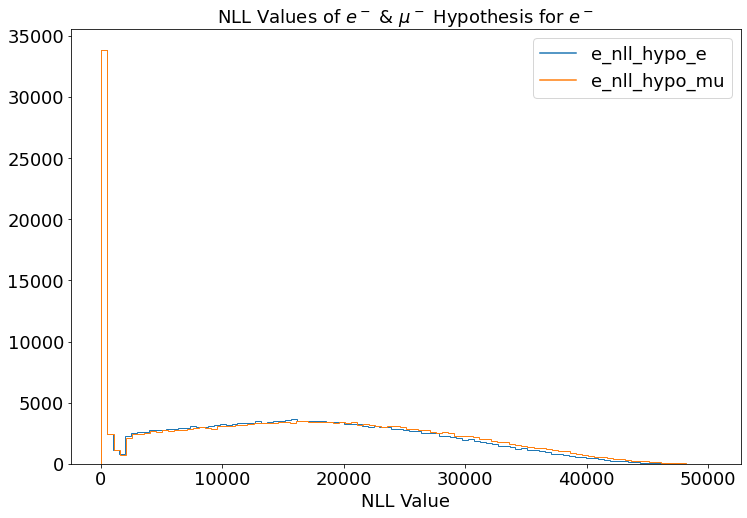

In [5]:
# Plotting histogram to check data
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.hist(e_nll_1, bins=100, label='e_nll_hypo_e', histtype='step', log=True)
ax.hist(e_nll_2, bins=100, label='e_nll_hypo_mu', histtype='step', log=True)

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels, fontsize=18)
plt.xlabel('NLL Value', fontsize=18)
plt.xticks(fontsize=18)  # changing x-axis lable size
plt.yticks(fontsize=18)
plt.title('NLL Values of $e^-$ & $\mu^-$ Hypothesis for $e^-$', fontsize=18)
plt.show()

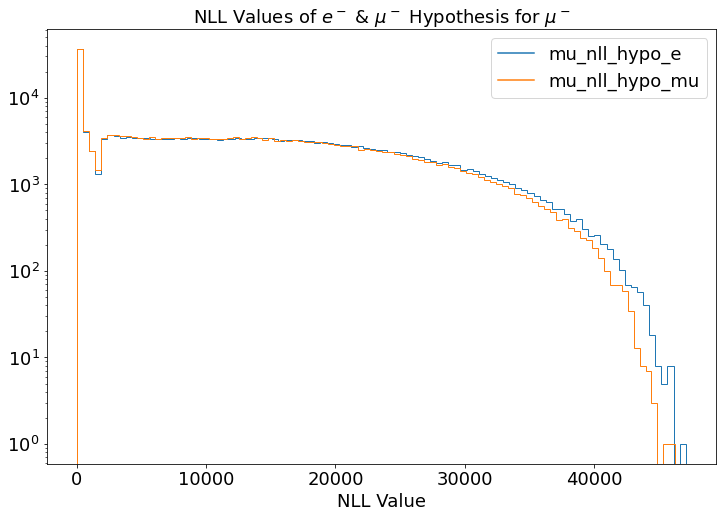

In [6]:
# Plotting mu histogram to check data
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.hist(mu_nll_1, bins=100, label='mu_nll_hypo_e', histtype='step', log=True)
ax.hist(mu_nll_2, bins=100, label='mu_nll_hypo_mu', histtype='step', log=True)

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels, fontsize=18)
plt.xlabel('NLL Value', fontsize=18)
plt.xticks(fontsize=18)  # changing x-axis lable size
plt.yticks(fontsize=18)
plt.title('NLL Values of $e^-$ & $\mu^-$ Hypothesis for $\mu^-$', fontsize=18)
plt.show()

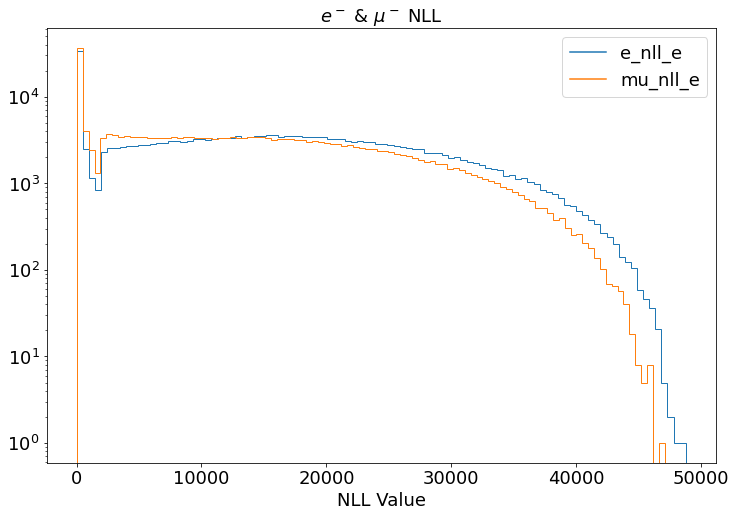

In [45]:
# Plotting e and mu histograms together
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.hist(e_nll_1, bins=100, label='e_nll_e', histtype='step', log=True)
ax.hist(mu_nll_1, bins=100, label='mu_nll_e', histtype='step', log=True)

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels, fontsize=18)
plt.xlabel('NLL Value', fontsize=18)
plt.xticks(fontsize=18)  # changing x-axis lable size
plt.yticks(fontsize=18)
plt.title('$e^-$ & $\mu^-$ NLL', fontsize=18)
plt.show()

# Processing NLL for e and mu

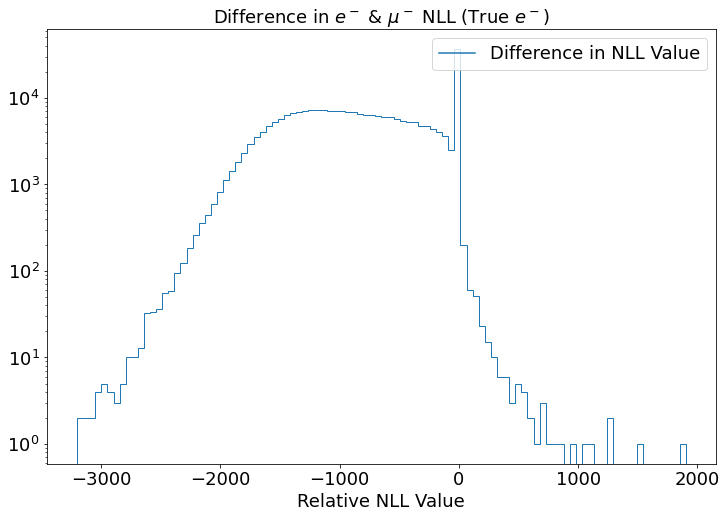

In [7]:
e_nll_diff_e = e_nll_1 - e_nll_2  # Small number = e; big number = mu
e_nll_diff_mu = e_nll_2 - e_nll_1  # Small number = mu; big number = e

# Plotting the difference in e and mu NLL value
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.hist(e_nll_diff_e, bins=100, label='Difference in NLL Value', histtype='step', log=True)

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels, fontsize=18)
plt.xlabel('Relative NLL Value', fontsize=18)
plt.xticks(fontsize=18)  # changing x-axis lable size
plt.yticks(fontsize=18)
plt.title('Difference in $e^-$ & $\mu^-$ NLL (True $e^-$)', fontsize=18)
plt.show()

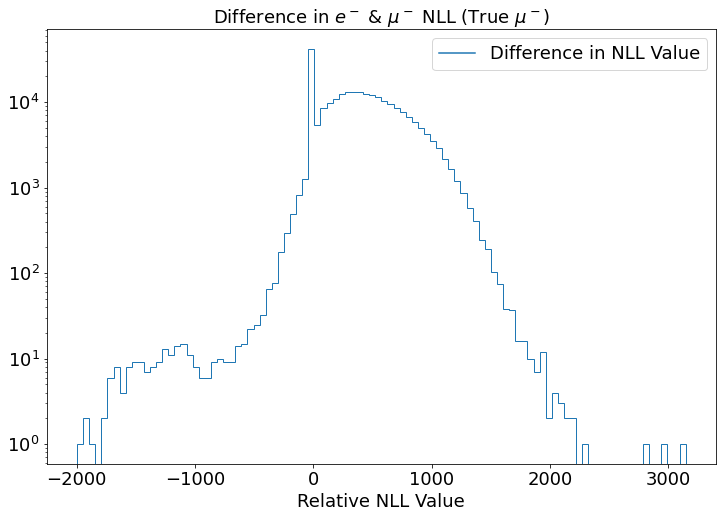

In [8]:
mu_nll_diff_e = mu_nll_1 - mu_nll_2  # Small number = e, big number = mu
mu_nll_diff_mu = mu_nll_2 - mu_nll_1  # Small number = mu, big number = e

# Plotting the difference in e and mu NLL value
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.hist(mu_nll_diff_e, bins=100, label='Difference in NLL Value', histtype='step', log=True)

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels, fontsize=18)
plt.xlabel('Relative NLL Value', fontsize=18)
plt.xticks(fontsize=18)  # changing x-axis lable size
plt.yticks(fontsize=18)
plt.title('Difference in $e^-$ & $\mu^-$ NLL (True $\mu^-$)', fontsize=18)
plt.show()

# Generating labels from FiTQun output

In [12]:
# Truth label
e_labels_e = np.ones(e_nll_diff_e.shape)
e_labels_mu = np.ones(e_nll_diff_mu.shape)
mu_labels_e = np.ones(mu_nll_diff_e.shape)*2
mu_labels_mu = np.ones(mu_nll_diff_mu.shape)*2

# concatenate labels and differences from mu and e events
diff_e = np.concatenate((mu_nll_diff_e, e_nll_diff_e), axis=0).astype(int)
labels_e = np.concatenate((mu_labels_e, e_labels_e), axis=0).astype(int)
diff_mu = np.concatenate((mu_nll_diff_mu, e_nll_diff_mu), axis=0).astype(int)
labels_mu = np.concatenate((mu_labels_mu, e_labels_mu), axis=0).astype(int)

# Calculating FPR and TPR

In [15]:
fq_fpr_e, fq_tpr_e, fq_threshold_e = roc_curve(labels_e, diff_e, pos_label=2)  # Note this asks for POSIIVE 
                                                                               # label. In the above NLL plot, pos
                                                                               # for true e situation is mu 
                                                                               # (which is 2)
fq_fpr_mu, fq_tpr_mu, fq_threshold_mu = roc_curve(labels_mu, diff_mu, pos_label=1)  # Similar as above

In [16]:
# Calculate AUC as a check
true_e_auc = auc(fq_fpr_e, fq_tpr_e)
true_mu_auc = auc(fq_fpr_mu, fq_tpr_mu)
print(true_e_auc, true_mu_auc)

0.9827225287673612 0.9827225287673611


# Saving to npz file

In [18]:
np.savez('processed_fq_output_ROC.npz', 
         fq_fpr_e = fq_fpr_e, fq_tpr_e = fq_tpr_e, fq_threshold_e = fq_threshold_e)